![image](https://www.houston-perio.com/wp-content/uploads/2019/07/STROKE.jpg)
# 1.1 Background
According to Mayo clinic **"An ischemic stroke occurs when the blood supply to part of the brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes.A stroke is a medical emergency, and prompt treatment is crucial."**
The goal of this project is use machine learning to predict if a person will have stroke based on some features

**Data**  
1) id: unique identifier  
2) gender: "Male", "Female" or "Other"  
3) age: age of the patient  
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension  
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease  
6) ever_married: "No" or "Yes"  
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"  
8) Residence_type: "Rural" or "Urban"  
9) avg_glucose_level: average glucose level in blood  
10) bmi: body mass index  
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*  
12) stroke: 1 if the patient had a stroke or 0 if not  

[Data source](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

## 1.1.1 Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, r2_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

## 1.1.2 Load Datasets

In [2]:
orig_df = pd.read_csv('Resources/healthcare-dataset-stroke-data.csv')
# View first 5 rows
orig_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# 1.2 Data Cleaning

In [3]:
# Creating a checkpoint
df = orig_df.copy()
# Displaying df
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Observation**  
* The id column is unique values, hence it has no importance to the model, hence it can be dropped

In [4]:
# Dropping the id column
df = df.drop(columns='id')
# Getting information on train_set1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


**Observation**
* All the data are of the right data types 
* BMI column contains missing values
* Since the number of missing values is not high, They will be replaced with mean

In [5]:
# Checking the bmi column
df['bmi'] = df['bmi'].fillna(value=df['bmi'].mean())
print('Missing values per column:')
print(df.isnull().sum())

Missing values per column:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


### 1.2.1 Checking Categorical Variables

In [6]:
# Checking the gender column
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

**The other must be dropped because it is single data and will cause problems during label encoding**

In [7]:
# Filtering Other in gender
df = df[df['gender'] != 'Other']
# Checking ever_married column
df['ever_married'].value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [8]:
# Checking the work_type column
df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [9]:
# Checking the Residence_type column
df['Residence_type'].value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [10]:
# Checking smoking status
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

### 1.2.2 Checking Numerical Variables

In [11]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.894508,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.698235,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Observation**
* Although the maximum of some numerical value is very high, they are not impossible values. Hence the data contains no outlier

* Hence the data is cleaned

* To end the data cleaning process, the data is split into train_set and test_set

### 1.2.3 Splitting the data

In [12]:
train_set, test_set = train_test_split(df, test_size=0.1, random_state=1, stratify=df['stroke'])
# Reset index
train_set.reset_index(drop=True, inplace=True)
test_set.reset_index(drop=True, inplace=True)

## 1.3 Exploratory Data Analysis

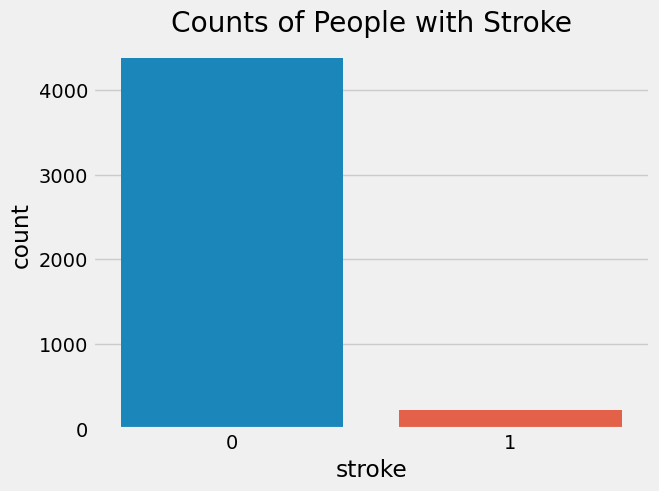

In [13]:
# Checking the number of people with stroke
sns.countplot(x='stroke',data=train_set)
plt.title("Counts of People with Stroke")
plt.savefig('images/Counts of People with Stroke.png',bbox_inches='tight')
plt.show()

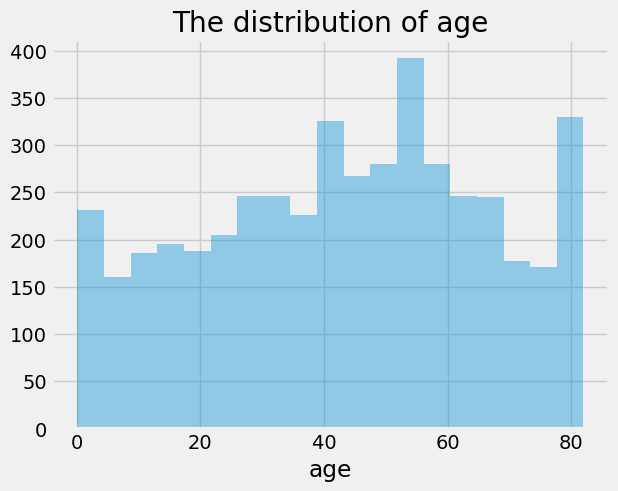

In [14]:
# Checking the distribution of age
sns.distplot(train_set['age'], kde=False)
plt.title('The distribution of age')
plt.savefig('images/The distribution of age.png',bbox_inches='tight')
plt.show()

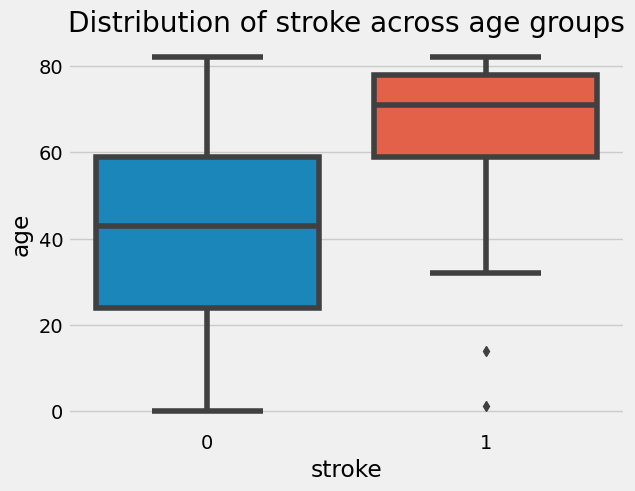

In [15]:
# Checking how Stroke is distributed among age groups
sns.boxplot(y='age',x='stroke',data=train_set)
plt.title('Distribution of stroke across age groups')
plt.savefig('images/Distribution of stroke across age groups.png',bbox_inches='tight')
plt.show()

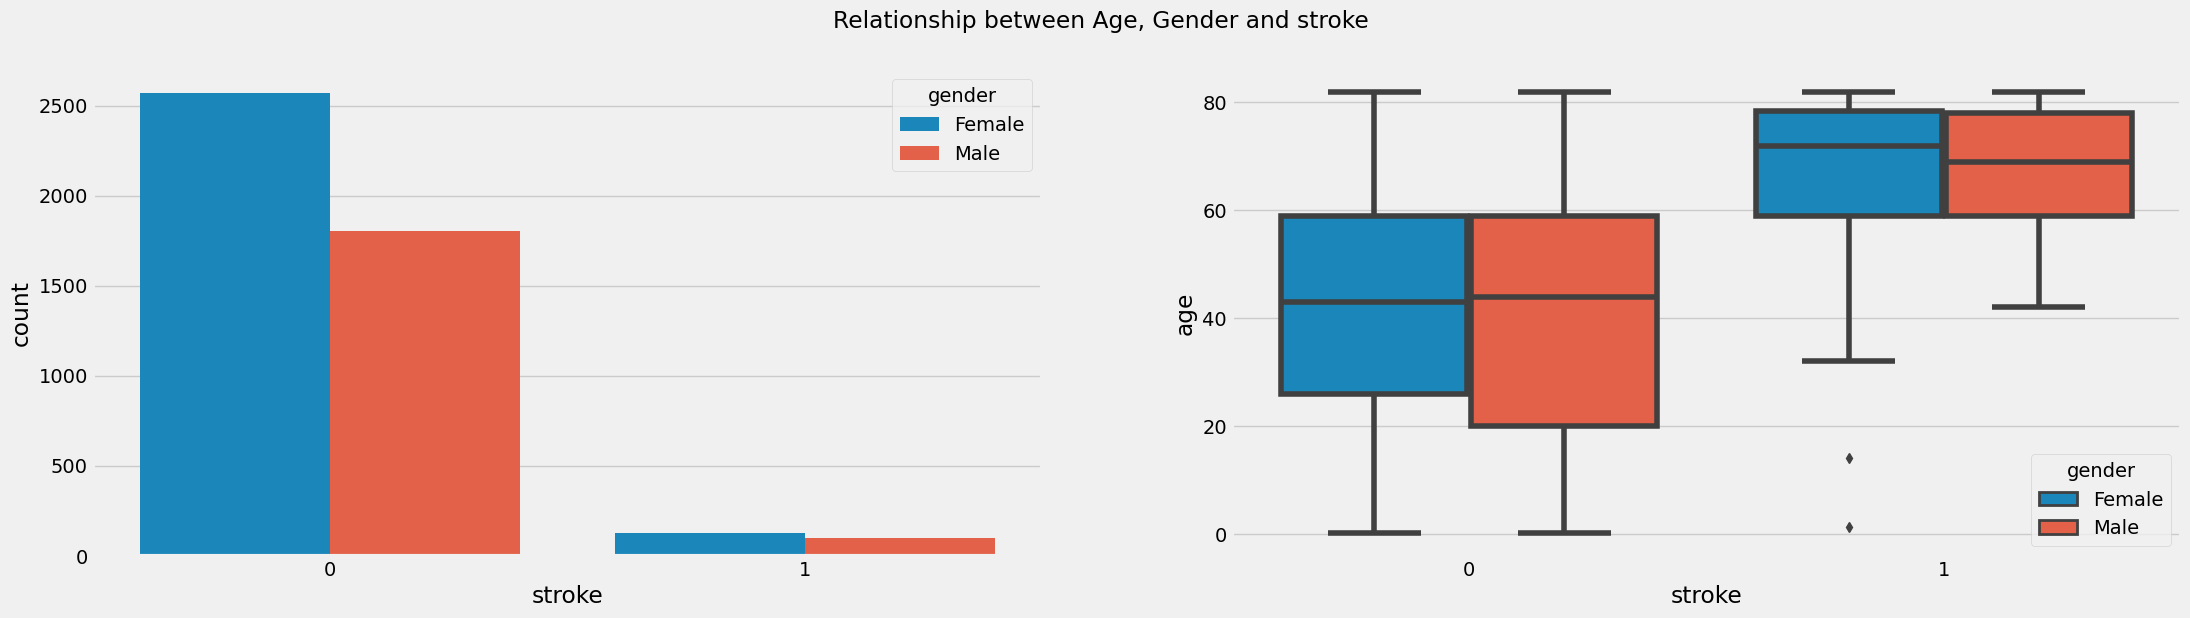

In [16]:
# Checking the relaationship between age, stroke and Gender
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (24, 6))
sns.countplot(x='stroke',hue='gender', data=train_set,ax=ax1)
sns.boxplot(y='age',x='stroke',hue='gender',data=train_set, ax=ax2)
fig.suptitle('Relationship between Age, Gender and stroke')
plt.savefig('images/Relationship between Age, Gender and stroke.png',bbox_inches='tight')
plt.show()

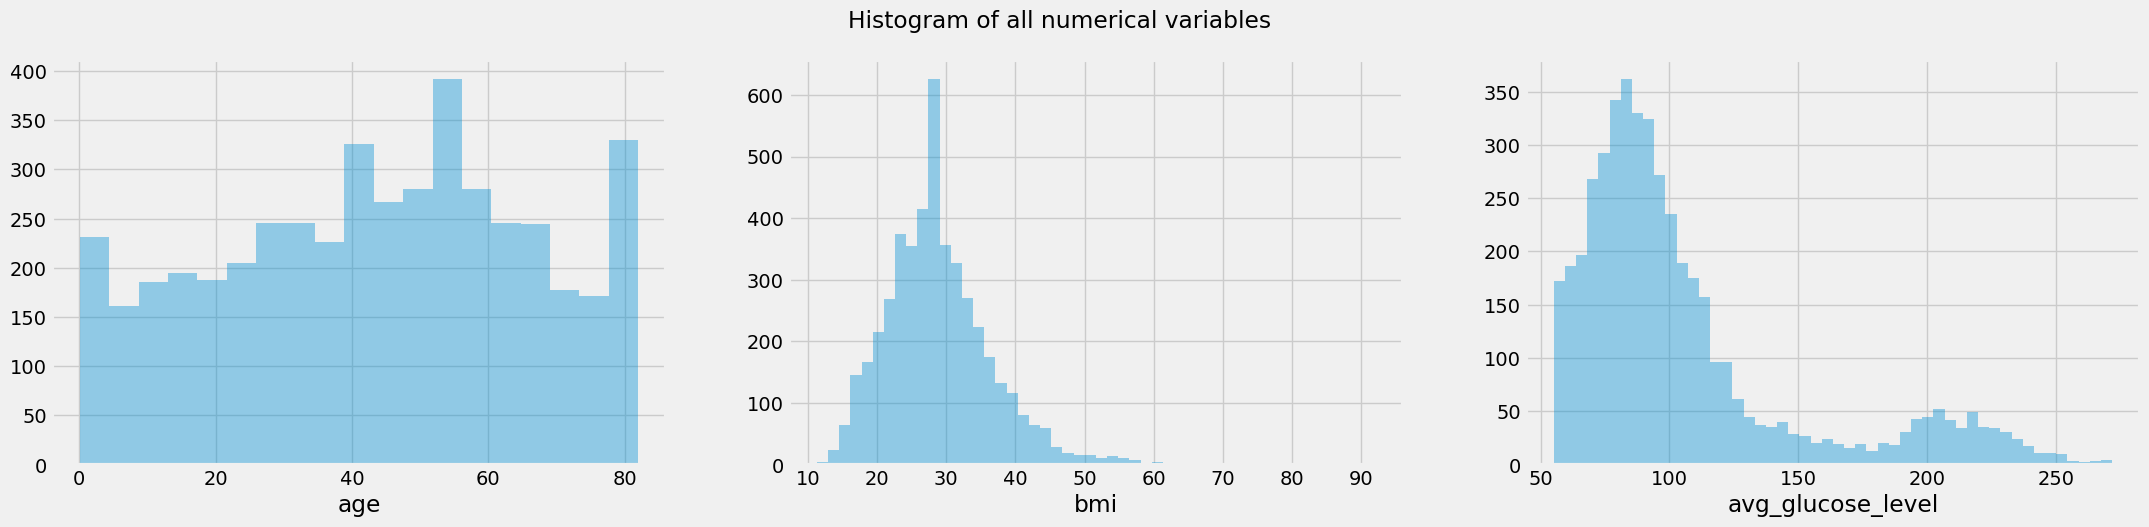

In [17]:
# Histogram of all numerical variables
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(24,5))
sns.distplot(train_set['age'], kde=False, ax=ax1)
sns.distplot(train_set['bmi'], kde=False, ax=ax2)
sns.distplot(train_set['avg_glucose_level'], kde=False, ax=ax3)
fig.suptitle('Histogram of all numerical variables')
plt.savefig('images/Histogram of all numerical variables.png',bbox_inches='tight')
plt.show()

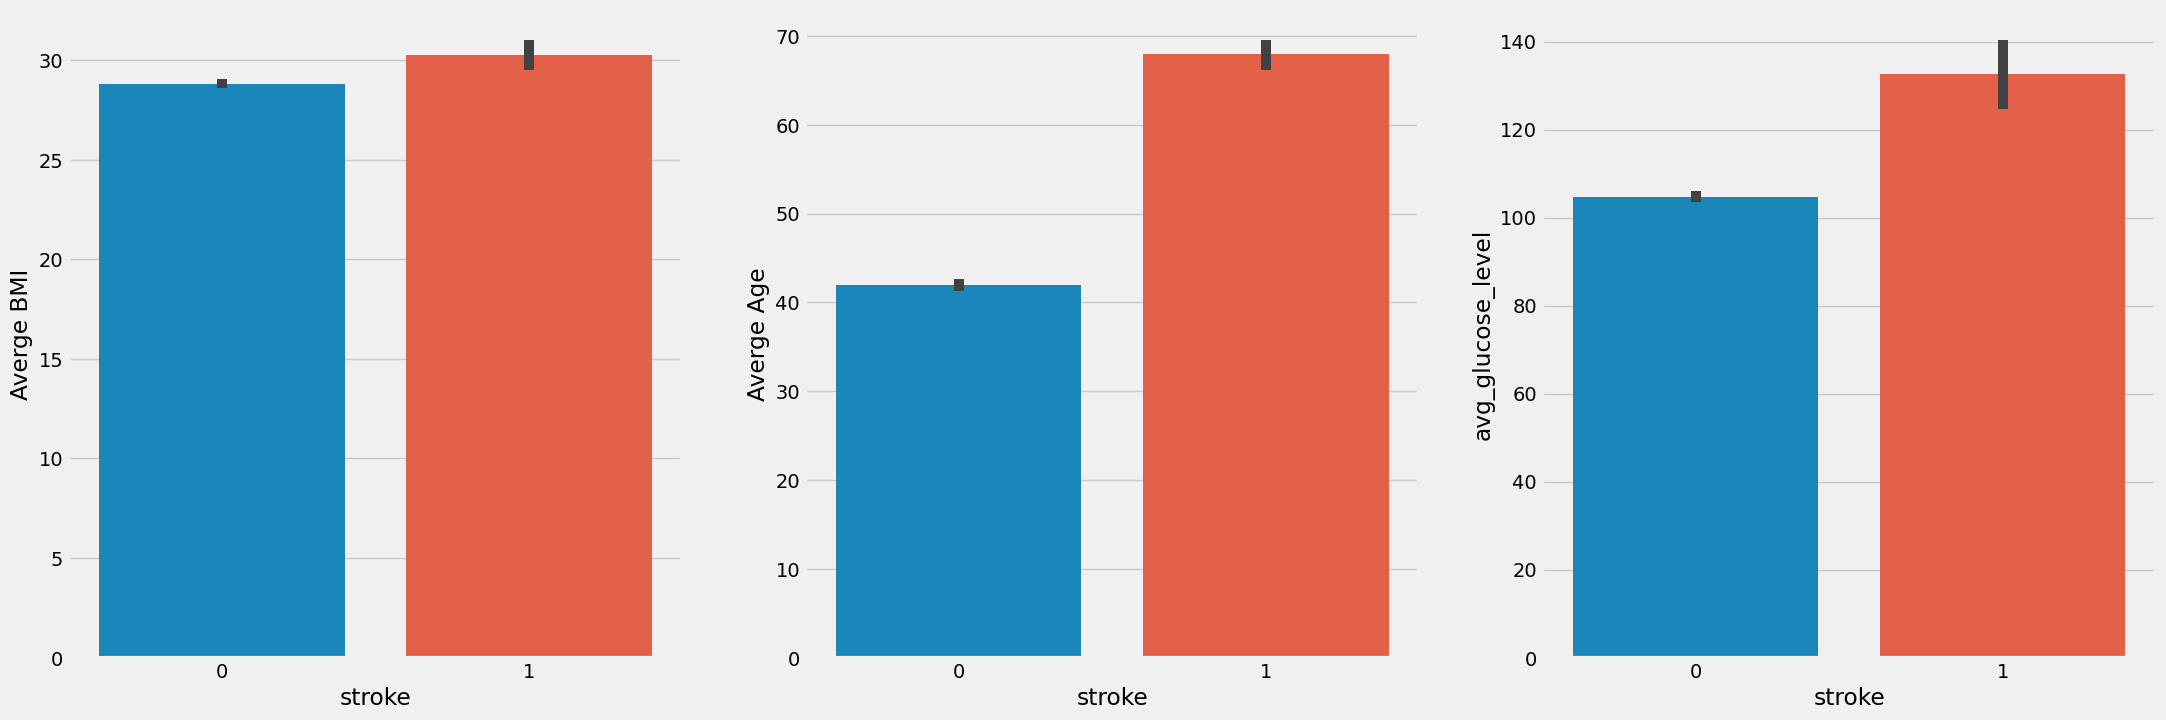

In [18]:
# Average of Each Numerical vaariable VS Stroke Variable
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (24, 8))
sns.barplot(x='stroke',y='bmi', data=train_set,ax=ax1)
ax1.set_ylabel('Averge BMI')
sns.barplot(x='stroke',y='age', data=train_set,ax=ax2)
ax2.set_ylabel('Averge Age')
sns.barplot(x='stroke',y='avg_glucose_level', data=train_set,ax=ax3)
ax3.set_ylabel('avg_glucose_level')
plt.savefig('images/Average of Each Numerical vaariable VS Stroke Variable.png',bbox_inches='tight')
plt.show()

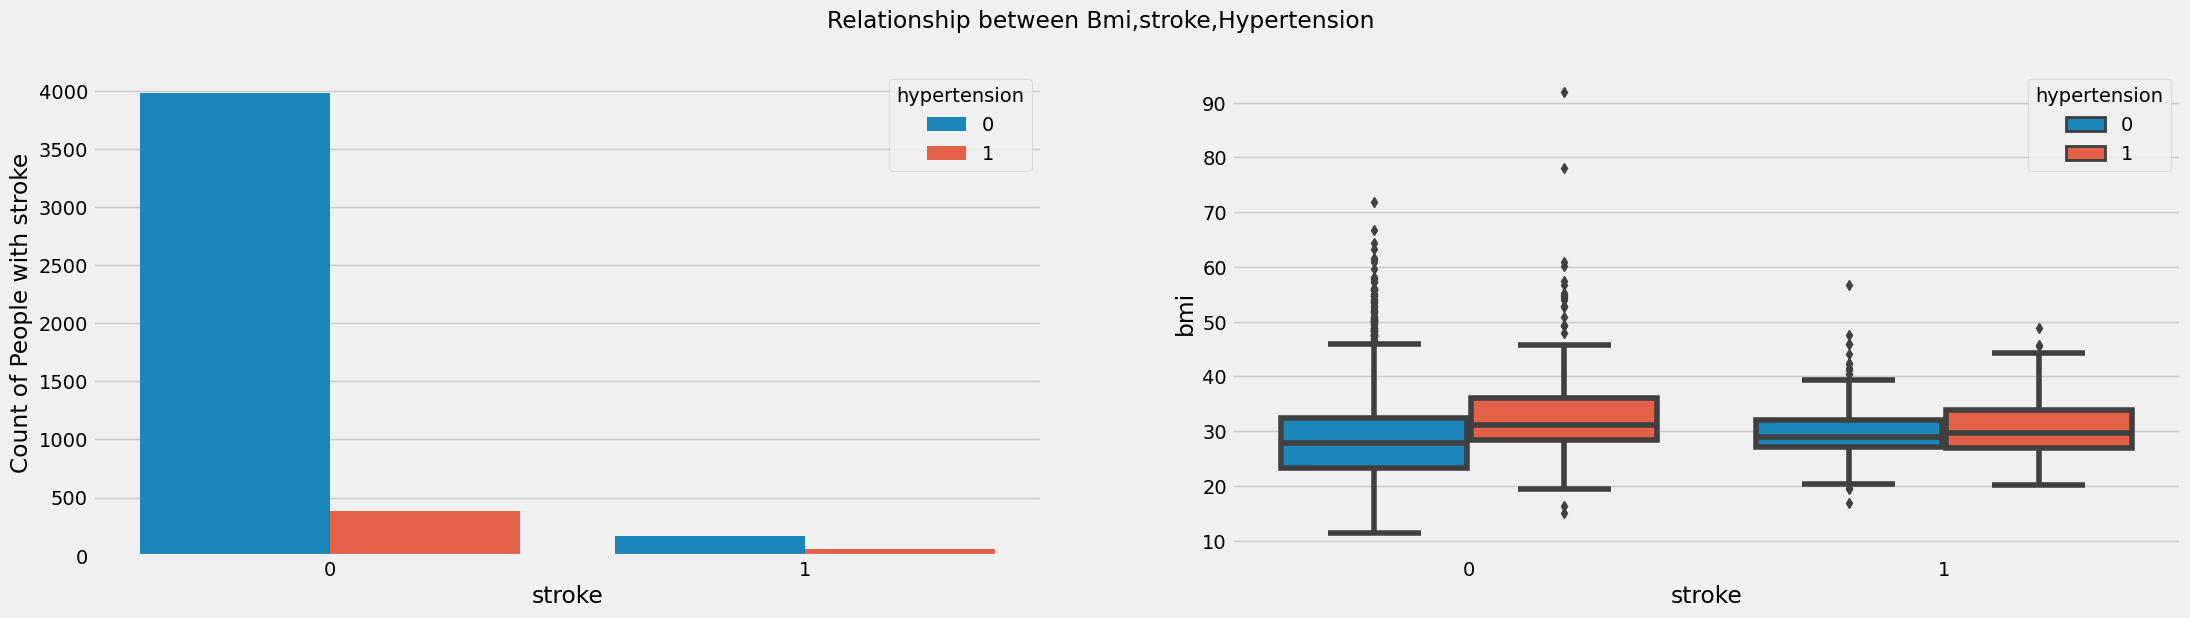

In [19]:
# Checking the relaationship between bmi, stroke and Hypertension
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (24, 6))
sns.countplot(x='stroke',hue='hypertension', data=train_set,ax=ax1)
ax1.set_ylabel('Count of People with stroke')
sns.boxplot(y='bmi',x='stroke',hue='hypertension',data=train_set, ax=ax2)
fig.suptitle('Relationship between Bmi,stroke,Hypertension')
plt.savefig('images/Relationship between Bmi,stroke,Hypertension.png',bbox_inches='tight')
plt.show()

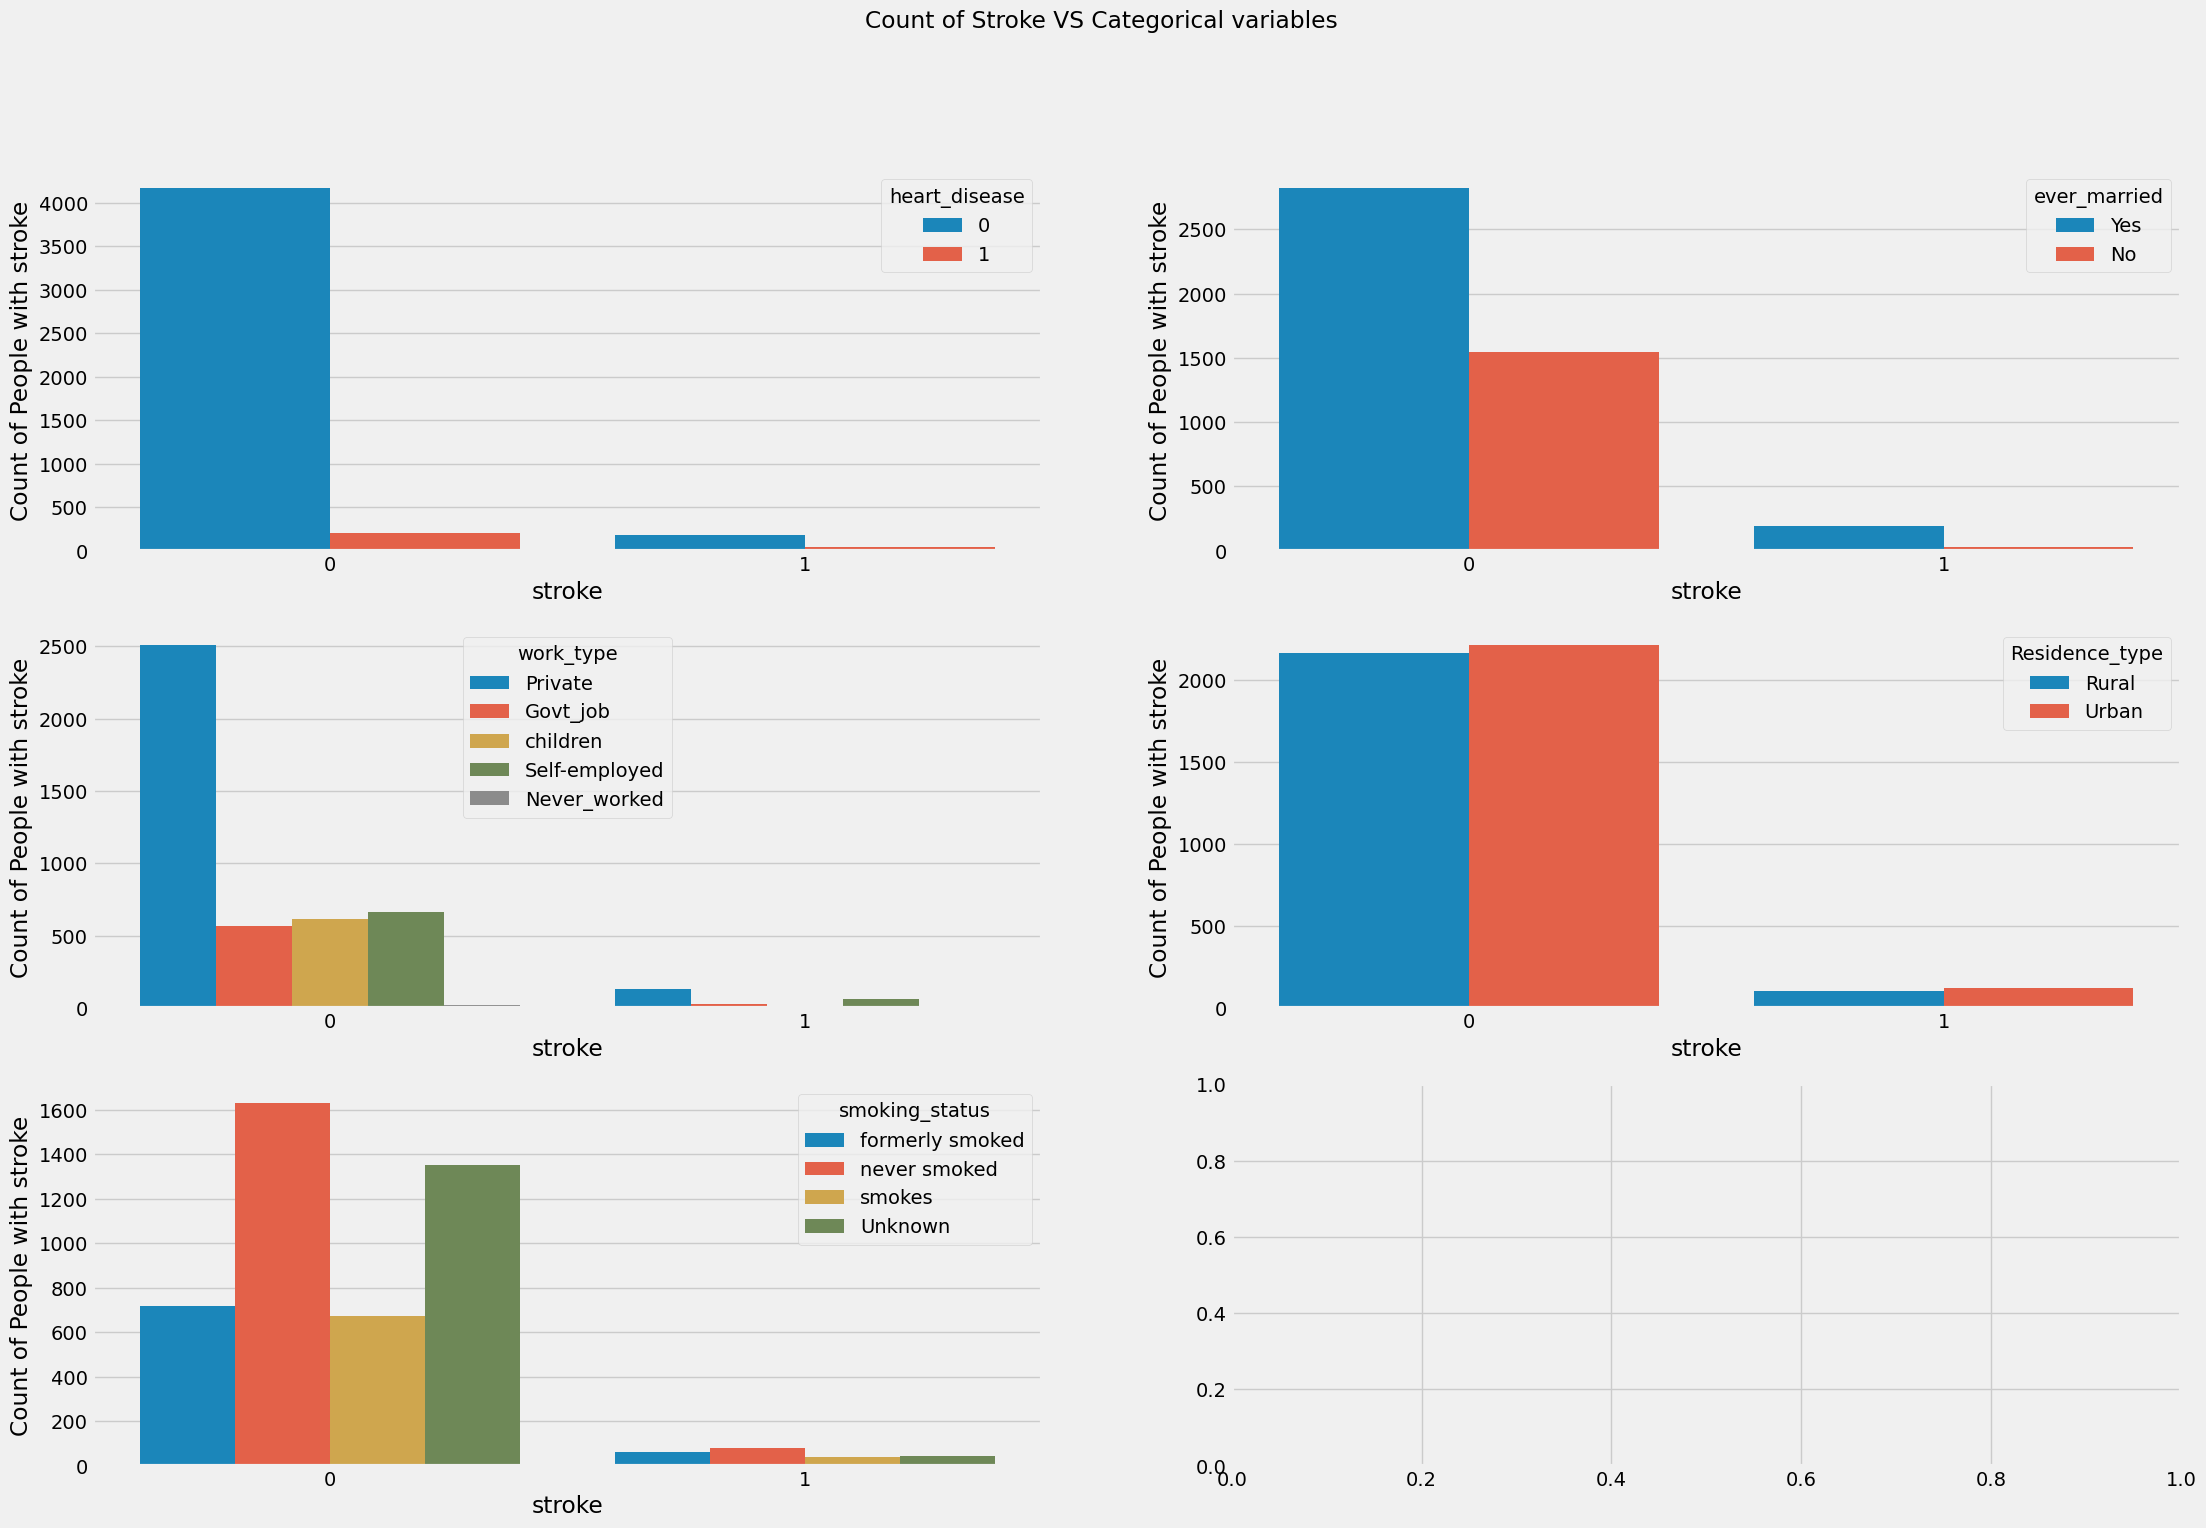

In [20]:
# Count of Stroke VS Each Independent Variable
fig, ax = plt.subplots(3,2, figsize = (24, 16))
sns.countplot(x='stroke',hue='heart_disease', data=train_set,ax=ax[0,0])
ax[0,0].set_ylabel('Count of People with stroke')
sns.countplot(x='stroke',hue='ever_married', data=train_set,ax=ax[0,1])
ax[0,1].set_ylabel('Count of People with stroke')
sns.countplot(x='stroke',hue='work_type', data=train_set,ax=ax[1,0])
ax[1,0].set_ylabel('Count of People with stroke')
sns.countplot(x='stroke',hue='Residence_type', data=train_set,ax=ax[1,1])
ax[1,1].set_ylabel('Count of People with stroke')
sns.countplot(x='stroke',hue='smoking_status', data=train_set,ax=ax[2,0])
ax[2,0].set_ylabel('Count of People with stroke')
fig.suptitle("Count of Stroke VS Categorical variables")
plt.savefig('images/Count of Stroke VS Categorical variables.png',bbox_inches='tight')
plt.show()

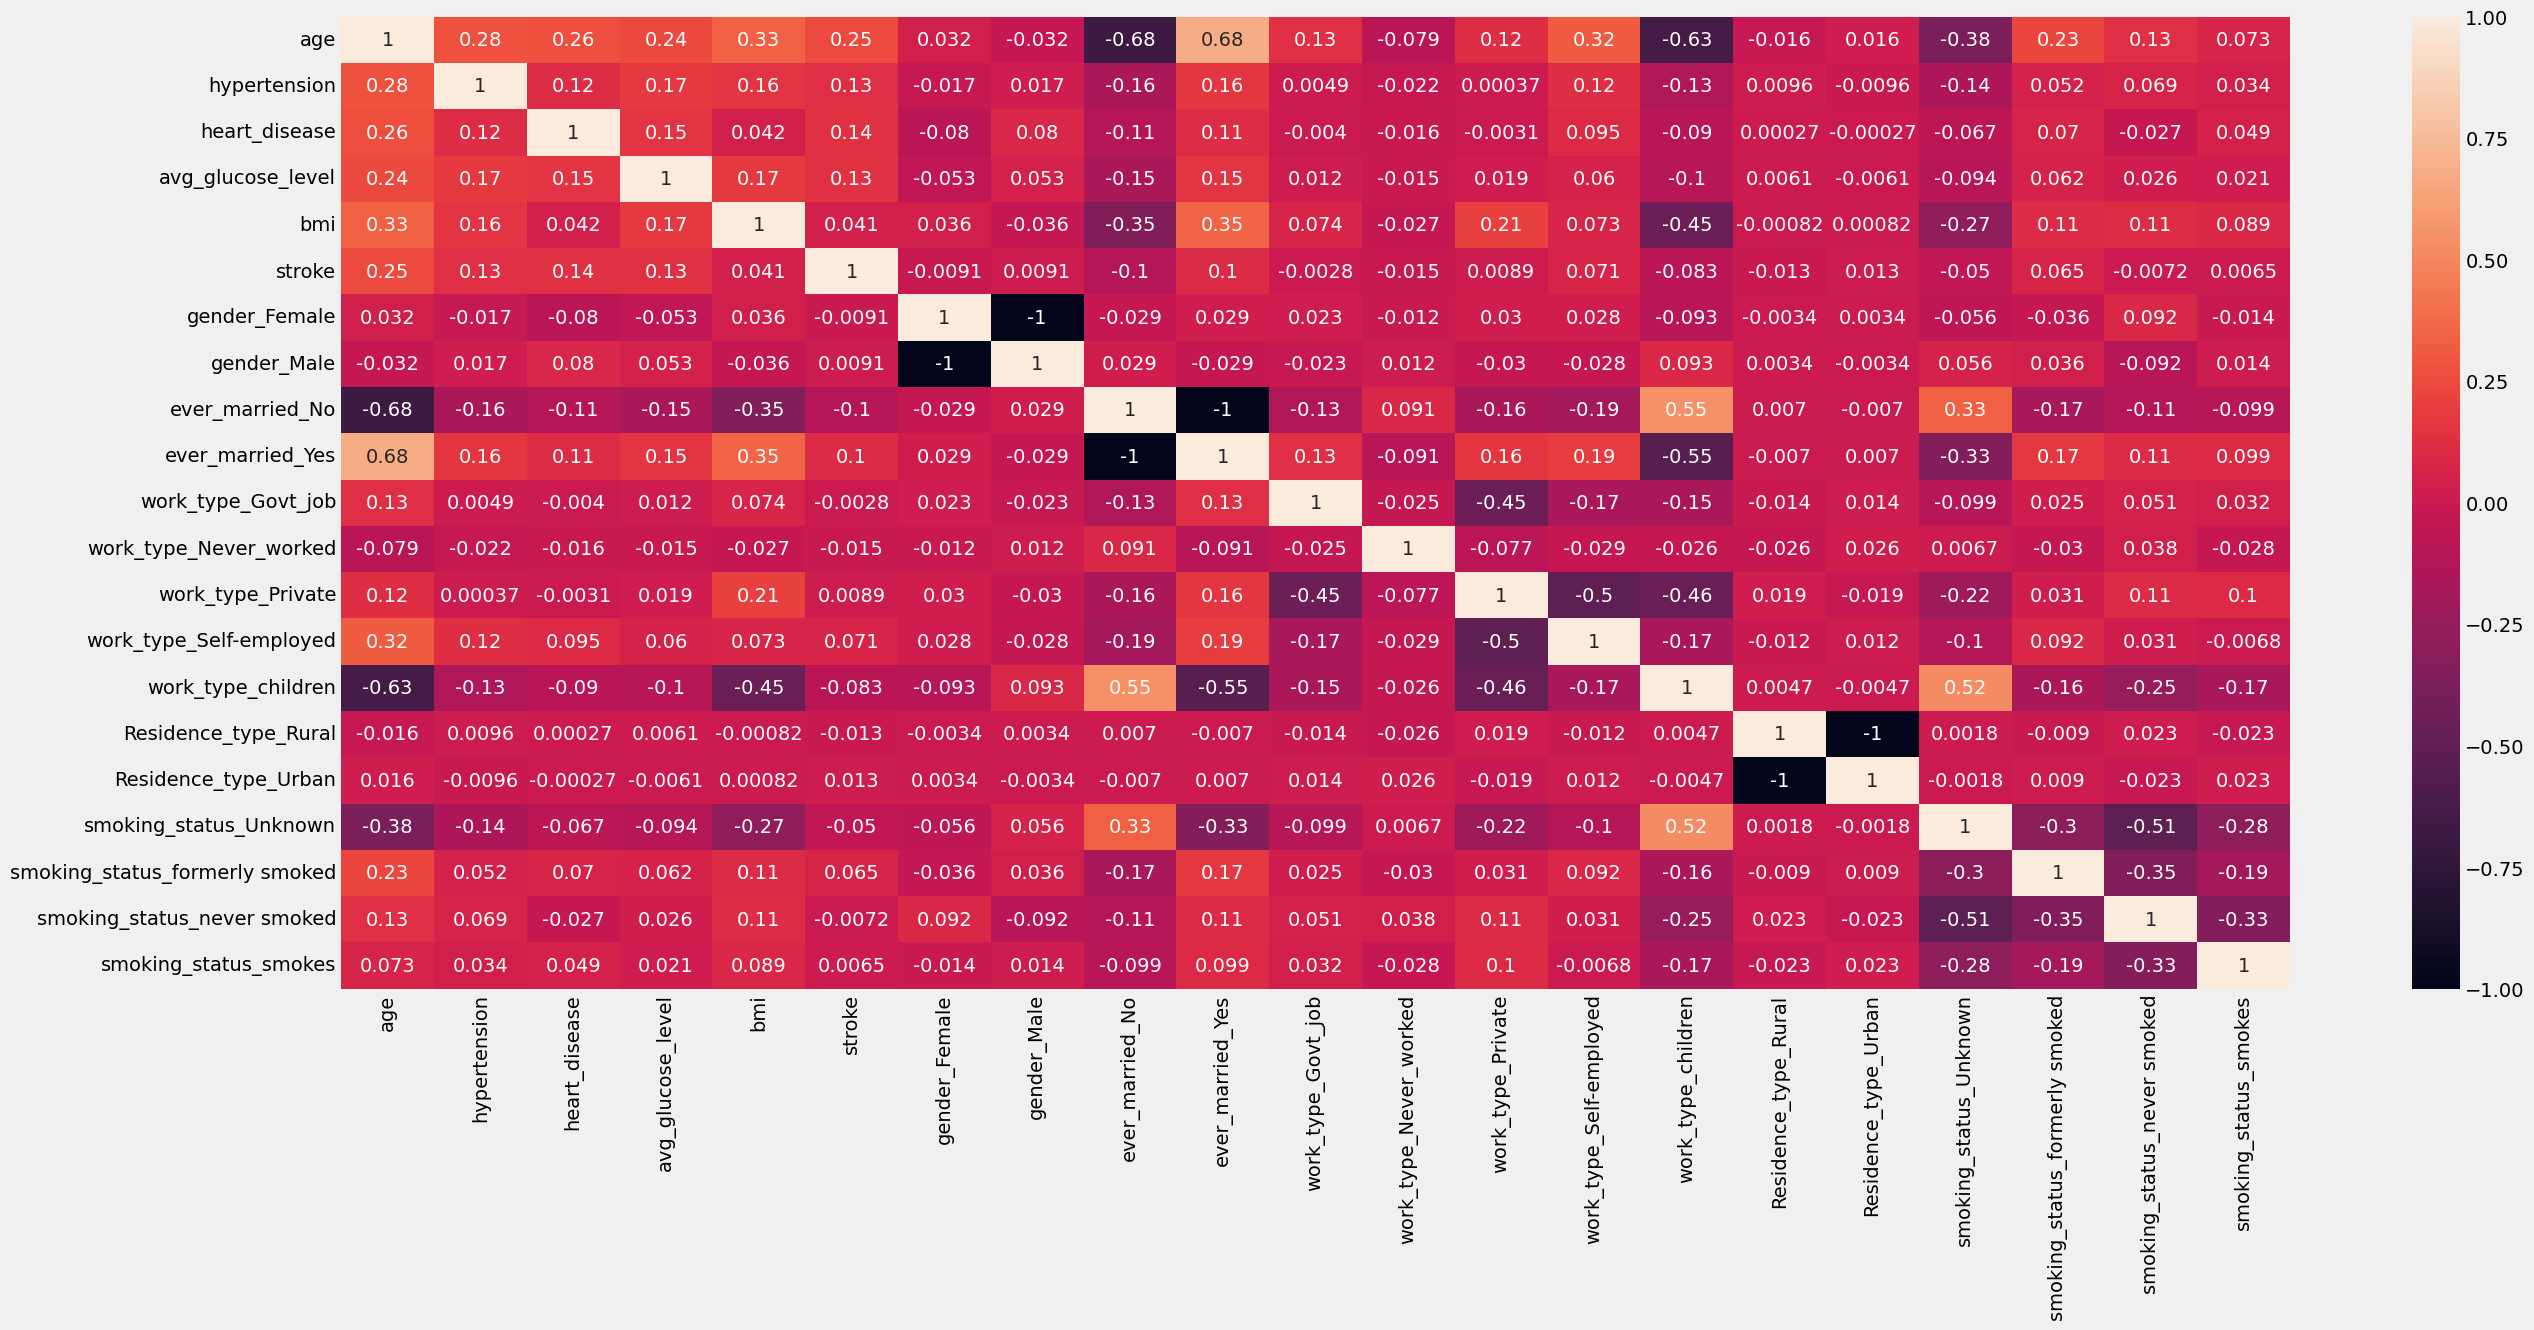

In [21]:
# Correlation Plot
plt.figure(figsize=(28, 12))
sns.heatmap(pd.get_dummies(train_set).corr(), annot= True)
plt.savefig("images/Correlation Plot.png",bbox_inches='tight')
plt.show()

**Observation**
* Age is partially normally distributed while avg_glucose_level and Bmi are rightly skewed
* Stroke is associated with the older population
* Stroke is higher in people with high average glucose level
* Stroke is more common in women
* Stroke is higher in people with high bmi.
* Married people are more susceptible to stroke
* Age, Hypertension, Heart disease and average glucose level are the most correlated to stroke
* Age is positively correlated to stroke, hence older people are associated with stroke
* Hypertension is positively correlated to stroke. Hypertension increase the likelihood of stroke
* Heart_disease is positively correlated to stroke. Presence of an heart_disease increase the likelihood of having stroke
* People living in Rural areas are less likely to have stroke

## 1.4 Data Preprocessing

###  1.4.1 Seperating Features from target

In [22]:
# Getting the train_set targets
train_target = train_set['stroke']
# Getting train_set predictors
train_inputs = train_set.drop('stroke',axis=1)

## 1.4.2 Creating data preprocessing pipeline

In [23]:
# Instantiate LabelEncoder
encoder = LabelEncoder()
# Use label Encoder on some data
train_inputs['ever_married'] = encoder.fit_transform(train_inputs['ever_married'])
# Get dummy variables for the Categorical variable
train_inputs = pd.get_dummies(train_inputs)
#MinMaxScalar
scalar = MinMaxScaler()
# Use MinMaxScaler to scale the independent variables
train_inputs[['age','avg_glucose_level','bmi']] = scalar.fit_transform(train_inputs[['age','avg_glucose_level','bmi']])
# Initializing PCA
pca = PCA()
# Use PCA to decorrelate the data
train_inputss = pca.fit_transform(train_inputs)
train_inputs.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,gender_Female,gender_Male,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.304199,0,0,1,0.195734,0.423792,1,0,0,0,1,0,0,1,0,0,1,0,0
1,0.645996,0,0,1,0.138722,0.221809,0,1,1,0,0,0,0,0,1,0,0,1,0
2,0.890137,0,1,1,0.033792,0.172243,0,1,0,0,1,0,0,1,0,0,0,0,1
3,0.377441,0,0,1,0.287093,0.211896,1,0,0,0,1,0,0,0,1,0,0,1,0
4,0.230957,0,0,0,0.316176,0.172243,0,1,0,0,1,0,0,0,1,1,0,0,0


In [24]:
# Creating Data preprocessing functions
def data_preprocesor(df):
    df_1 = df['stroke']
    df_2 = df.drop('stroke',axis=1)
    # Use label Encoder on some data
    df_2['ever_married'] = encoder.fit_transform(df_2['ever_married'])
    df_2 = pd.get_dummies(df_2)
    #MinMaxScalar
    scalar = MinMaxScaler()
    df_2[['age','avg_glucose_level','bmi']] = scalar.fit_transform(df_2[['age','avg_glucose_level','bmi']])
    df_2_scaled = pca.fit_transform(df_2)
    return df_2_scaled, df_1

## 1.5 Model Fitting

* The data will be trained on two models
   * LogisticRegression : This will be used as the baseline model (This is test model that our main model must beat to be accepted)
   * XGBClassifier : This will be used as the main model to predict stroke

In [25]:
# Initialize baseline model
baseline_model = LogisticRegression()
# Training the baseline model
baseline_model.fit(train_inputss,train_target)
r2_value = r2_score(train_target, baseline_model.predict(train_inputss))
print(f'The baseline accuracy score is ={np.round(baseline_model.score(train_inputss,train_target),2) * 100}%')

The baseline accuracy score is =95.0%


## 1.5.2 Model Creation

In [26]:
# Instantiate XGBClassifier
model = XGBClassifier(random_state=0)
# Training the model
model.fit(train_inputss, train_target)
# Predicting the target
stroke_pred = model.predict(train_inputss)
# calculating accuracy score
model_accuracy = np.round(accuracy_score(train_target, stroke_pred), 3) * 100
# Recall_score
model_recall = np.round(recall_score(train_target, stroke_pred), 3) * 100
# Model Precision
model_precision = np.round(precision_score(train_target, stroke_pred), 3) * 100
# Model f1_score
model_f1 = np.round(f1_score(train_target, stroke_pred), 3) * 100
print('The model accuracy_score =',model_accuracy)
print('The model recall score =',model_recall)
print('The model precision =',model_precision)
print('The model f1_score =',model_f1)

The model accuracy_score = 100.0
The model recall score = 100.0
The model precision = 100.0
The model f1_score = 100.0


In [27]:
#Generating classification report
print(classification_report( train_target, stroke_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4374
           1       1.00      1.00      1.00       224

    accuracy                           1.00      4598
   macro avg       1.00      1.00      1.00      4598
weighted avg       1.00      1.00      1.00      4598



**Observation**
* The model had an accuracy of 100
* The model beats the baseline model, hence we have to perform cross validation and hyperparameter tuning

## 1.5.3 Hyperparameter Tuning

In [28]:
# Define the hyperparameter distributions
param_dist = {
    'max_depth': stats.randint(3, 10),
    'learning_rate': stats.uniform(0.01, 0.1),
    'subsample': stats.uniform(0.5, 0.5),
    'n_estimators':stats.randint(50, 200)
}

# Create the XGBoost model object
xgb_model = XGBClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')

# Fit the RandomizedSearchCV object to the training data
random_search.fit(train_inputss, train_target)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.06566531137644421, 'max_depth': 3, 'n_estimators': 79, 'subsample': 0.7039398282075671}
Best score:  0.9515006860008517


**Observation**
* From the hyper-parameter tuning, the best model that won't overfit had an accuraccy of 95%

## 1.5.4 Model Evaluation

In [29]:
# Putting the test_set in the right format using Data_preprocessor
test_input, test_target = data_preprocesor(test_set)
# Using model to predict test stroke patient
test_pred = model.predict(test_input)
# Getting the accuracy_score
test_accuracy = accuracy_score(test_target, test_pred)
print('The test_set accuracy is',np.round(test_accuracy, 3) * 100)

The test_set accuracy is 95.1


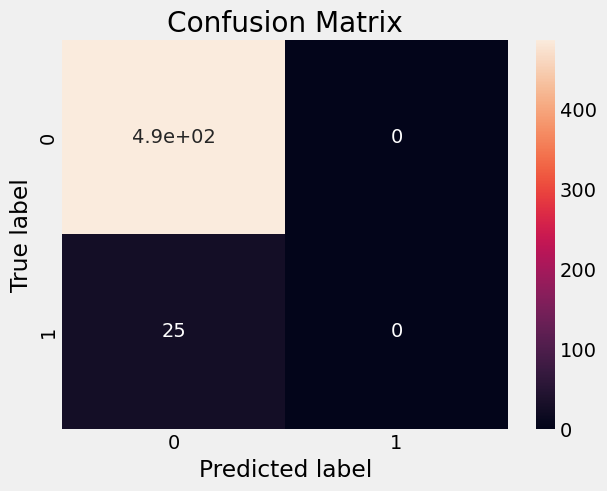

In [30]:
# Confusion Matrix
sns.heatmap(confusion_matrix(test_target, test_pred), annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig('images/Confusion Matrix.png')
plt.show()

**Observation**
* The model had 95% accuracy on new data
* It performs poorly in predicting people with stroke
* To improve on this, we have to resample the data

## 1.5.5 Resampling

In [42]:
# Import imblearn
from imblearn.over_sampling import SMOTE
# Instantiate SMOTE
sm = SMOTE()

In [43]:
# Checking the number of people with stroke
print(f'The number of people with stroke is {sum(train_target == 1)}')
# Checking number of people without stroke
print(f'The number of people without stroke is {sum(train_target == 0)}')

The number of people with stroke is 224
The number of people without stroke is 4374


In [44]:
# Resampling the data
train_input_smote, train_target_smote = sm.fit_resample(train_inputss, train_target)
# Getting the new counts after resampling
print(f'The number of people with stroke after resampling is {sum(train_target_smote == 1)}')
print(f'The number of people without stroke after resampling is {sum(train_target_smote == 0)}')

The number of people with stroke after resampling is 4374
The number of people without stroke after resampling is 4374


## 1.5.6 Creating new Model using resampled data

In [45]:
# Instantiate XGBClassifier
new_model = XGBClassifier(random_state=1)
# Training the model
new_model.fit(train_input_smote, train_target_smote)
# Using new_model to predict test stroke patient
new_test_pred = new_model.predict(test_input)

# Getting the accuracy_score
new_test_accuracy = accuracy_score(test_target, new_test_pred)
print('The test_set accuracy is',np.round(new_test_accuracy, 3) * 100)

The test_set accuracy is 92.4


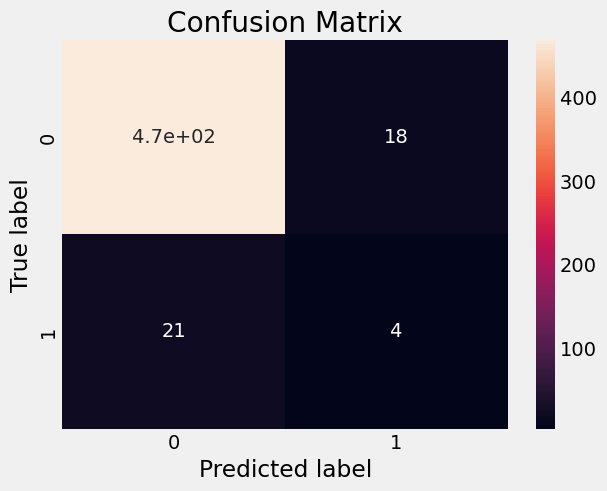

In [47]:
# Confusion Matrix
sns.heatmap(confusion_matrix(test_target, new_test_pred), annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig('images/Confusion Matrix.png')
plt.show()

**Observation**
* The model had 92.4% accuracy after resampling
* True Negatives: 470 False Positives: 18 False Negatives: 21 True Positives: 4
* After resampling, the model now predicts people with stroke
* The side effects of the resampling is that our accuracy reduced.
* This model is relatively better at predicting people with stroke


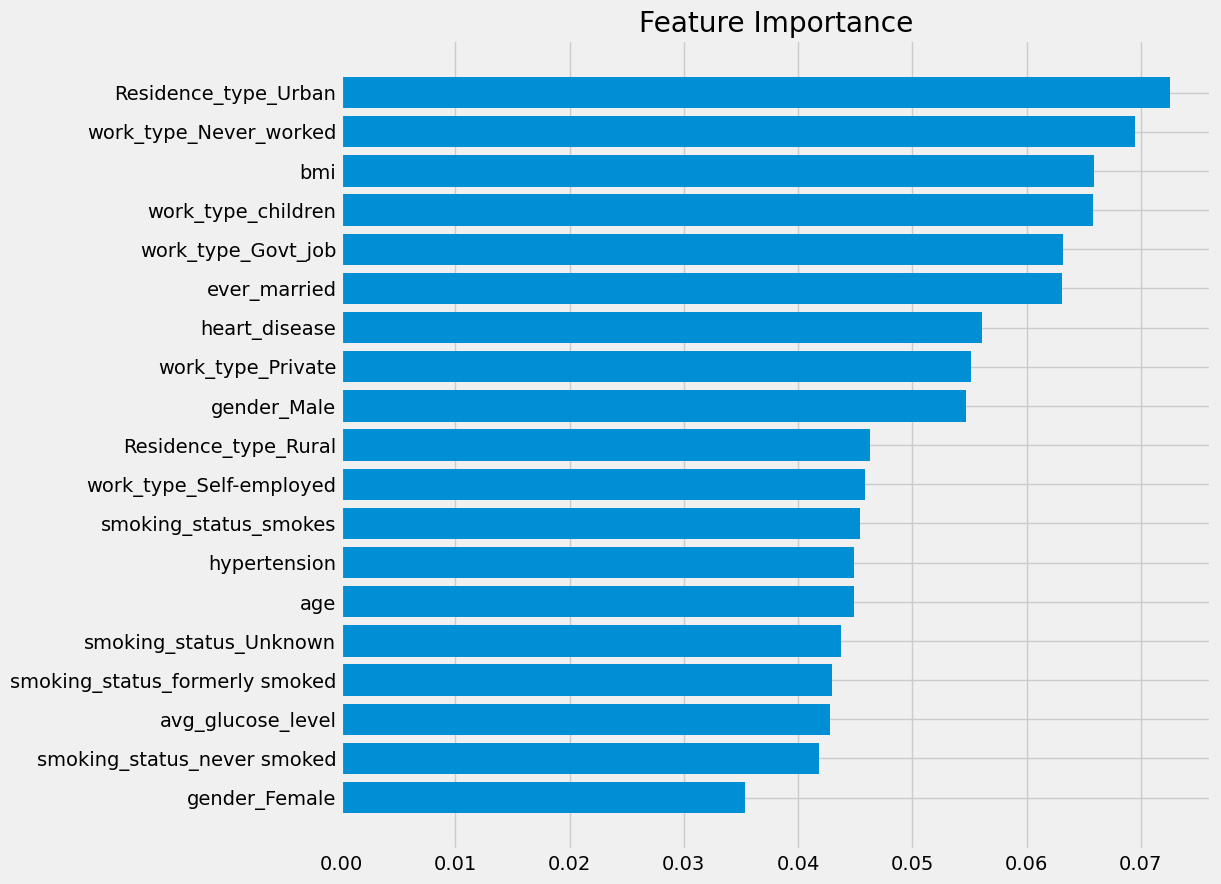

In [48]:
# Get Feature Importance
feature_importance = pd.DataFrame()
feature_importance['Feature_name'] = train_inputs.columns
feature_importance['Feature_importance'] = model.feature_importances_
# Sort the Feature Importance
feature_importance = feature_importance.sort_values(by=['Feature_importance'], ascending=True)
# Feature_Importance Plot
plt.figure(figsize=(10,10))
plt.barh(y=feature_importance['Feature_name'],width=feature_importance['Feature_importance'])
plt.title('Feature Importance')
plt.savefig('images/Feature Importance.png',bbox_inches='tight')
plt.show()

**Observation**
* The most 3 important feature to the prediction of stroke are Residence_type, work_type, and bmi

## **1.6 Recommendation**

* The older generation are very susceptible to stroke, hence they must work in a stress free area and eating foods with high sugar level should be avoided 
* Bmi is positively correlated to stroke, hence the population must be careful of thier body weight to reduce the risk of stroke
* Stroke is more common among women hence women should avoid things that triggers shock and heart diseases.
* Private worker tends to have strokes more than any other work type, this may due to the fact that people that work Private tends to worry alot and less time to exercise and may eat highly carboneus food. Hence private worker people needs to pay more attention to thier health
* Residence is the most important feature to the model hence and it is found that people living in rural areas have a lesser likelihood of having strokes.
* The three most important features to the model are residence_type, work_type and bmi, these feautures are factors that affects the every day life of a person. Hence improving the population standard will drastically reduce the likelihood of stroke


* To increase the accuracy of the model
   * More data should be provided and features that have higher correlation to stroke should be provided
   * Feature engineering can be performed on new data provided
   * A data that is balanced should be provided